In [137]:
# !pip install pandas matplotlib seaborn scikit-learn scipy torch tensorflow keras optuna xgboost
# !pip install lightgbm catboost
# !pip install category_encoders

In [138]:
import pandas as pd

# Autor: Morariu Tudor

train_data = pd.read_csv("IA Energy Consumption.csv")
targets = pd.read_csv("targets.csv")

drop_cols_train = ["Unnamed: 1", "Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20"]
drop_cols_target = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]

train_data.drop(columns=drop_cols_train, inplace=True)
targets.drop(columns=drop_cols_target, inplace=True)

display(train_data.head())
display(targets.head())

,timp(ms),sch operatii,task1,repetare,speed,J1,J2,J3,J4,J5,J6,X,Y,Z
0,1580,0,to_home,48,0.0,-0.468792,21.74544,-10.45525,-0.000725,78.71111,-0.523038,575.9996,-4.711300,546.9863
1,1738,0,to_home,48,0.0,-0.468581,21.74544,-10.45514,-0.000725,78.71111,-0.522867,575.9995,-4.712357,546.9863
2,1859,0,to_home,48,0.0,-0.468687,21.74544,-10.45525,-0.000725,78.71127,-0.522857,575.9995,-4.711299,546.9857
3,1984,0,to_home,48,0.0,-0.468687,21.74554,-10.45525,-0.000455,78.71110,-0.522848,575.9995,-4.711599,546.9857
4,2102,0,to_home,48,0.0,-0.468687,21.74544,-10.45514,-0.000725,78.71127,-0.522945,575.9998,-4.711602,546.9871


,timp(ms),P(KW)
0,1693,0.225484
1,1708,0.225484
2,1718,0.225484
3,1729,0.225484
4,1740,0.225484


In [139]:
def process_row(row):
    row["target"] = targets[abs(targets["timp(ms)"] - row["timp(ms)"]) < 500]["P(KW)"].mean()

    return row

train_data = train_data.apply(process_row, axis=1)

<Axes: >

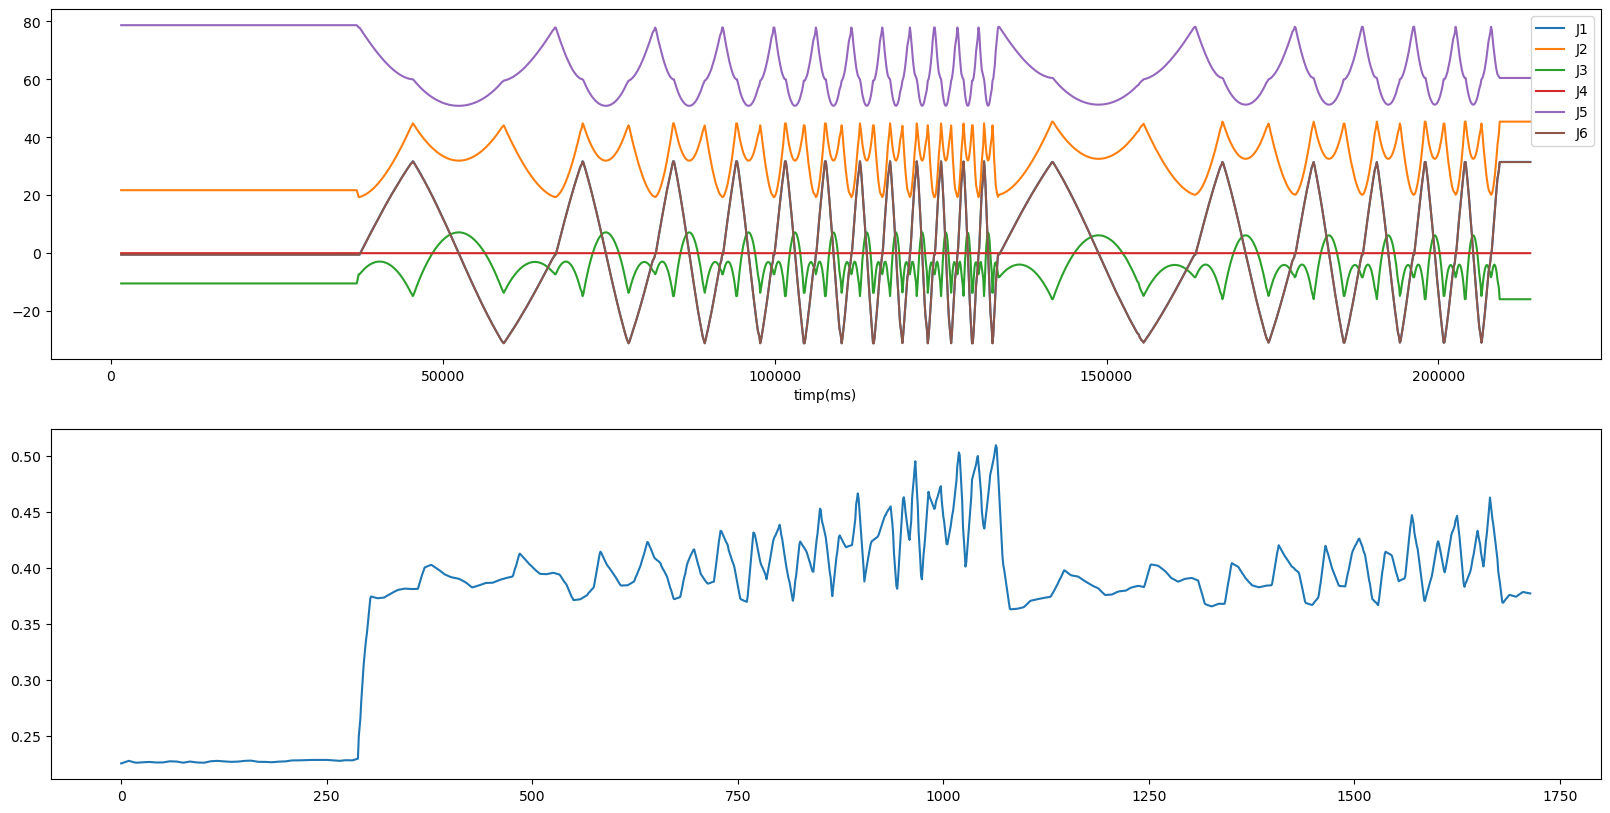

In [140]:
import matplotlib.pyplot as plt

ax = plt.figure(figsize=(20, 10)).subplots(2, 1)

plot_cols = ["J1", "J2", "J3", "J4", "J5", "J6", "timp(ms)"]

# train_data["J_sum"] = train_data["J1"] + train_data["J2"] + train_data["J3"] + train_data["J4"] + train_data["J5"] + train_data["J6"]

train_data[plot_cols].plot(x="timp(ms)", ax=ax[0])
train_data["target"].plot(x="timp(ms)", ax=ax[1])

In [141]:
train_X = train_data.drop(columns="target")
train_y = train_data["target"]

In [142]:
import category_encoders as ce

encoder = ce.CatBoostEncoder().fit(train_data.drop(columns="target"), train_data["target"])

train_X = encoder.transform(train_X)

<Axes: >

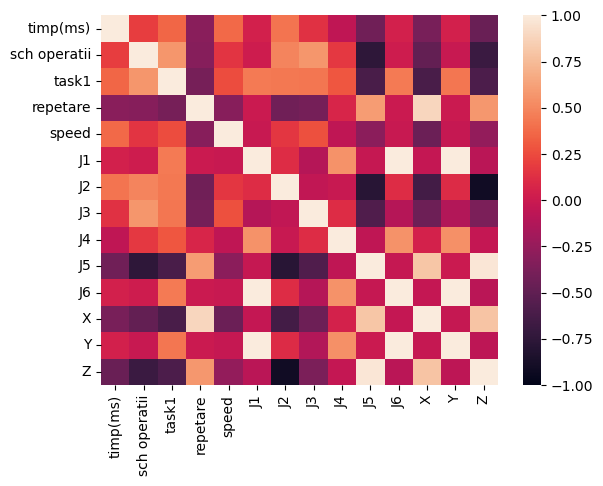

In [143]:
import seaborn as sns

sns.heatmap(train_X.corr(), vmin=-1.0, vmax=1.0)

In [ ]:
import catboost
from sklearn.model_selection import cross_val_score

######### optuna pentru tunarea hiperparametrilor

# model = catboost.CatBoostRegressor(n_estimators=1200, max_depth=12)
# scores = cross_val_score(model, train_X, train_y, cv=7) 

######### KFold pentru a obtine un scor mai precis. Sunt putine date.

In [ ]:
print("Scoruri pe fold individual:", scores)

Scoruri pe fold individual: [-9.37489741  0.62006026  0.75174334  0.57201118  0.59952842 -0.68509372  0.40637884]

In [145]:
test_X = train_X[-300:]
test_y = train_y[-300:]

train_X = train_X[:-300]
train_y = train_y[:-300]

In [ ]:
model = catboost.CatBoostRegressor(n_estimators=1200, max_depth=12)

model.fit(train_X, train_y)

In [150]:
predictii = model.predict(test_X)

# print("Predictii:", predictii)
print("Scor R^2:", model.score(test_X, test_y))

Scor R^2: 0.24187601917760393


[]

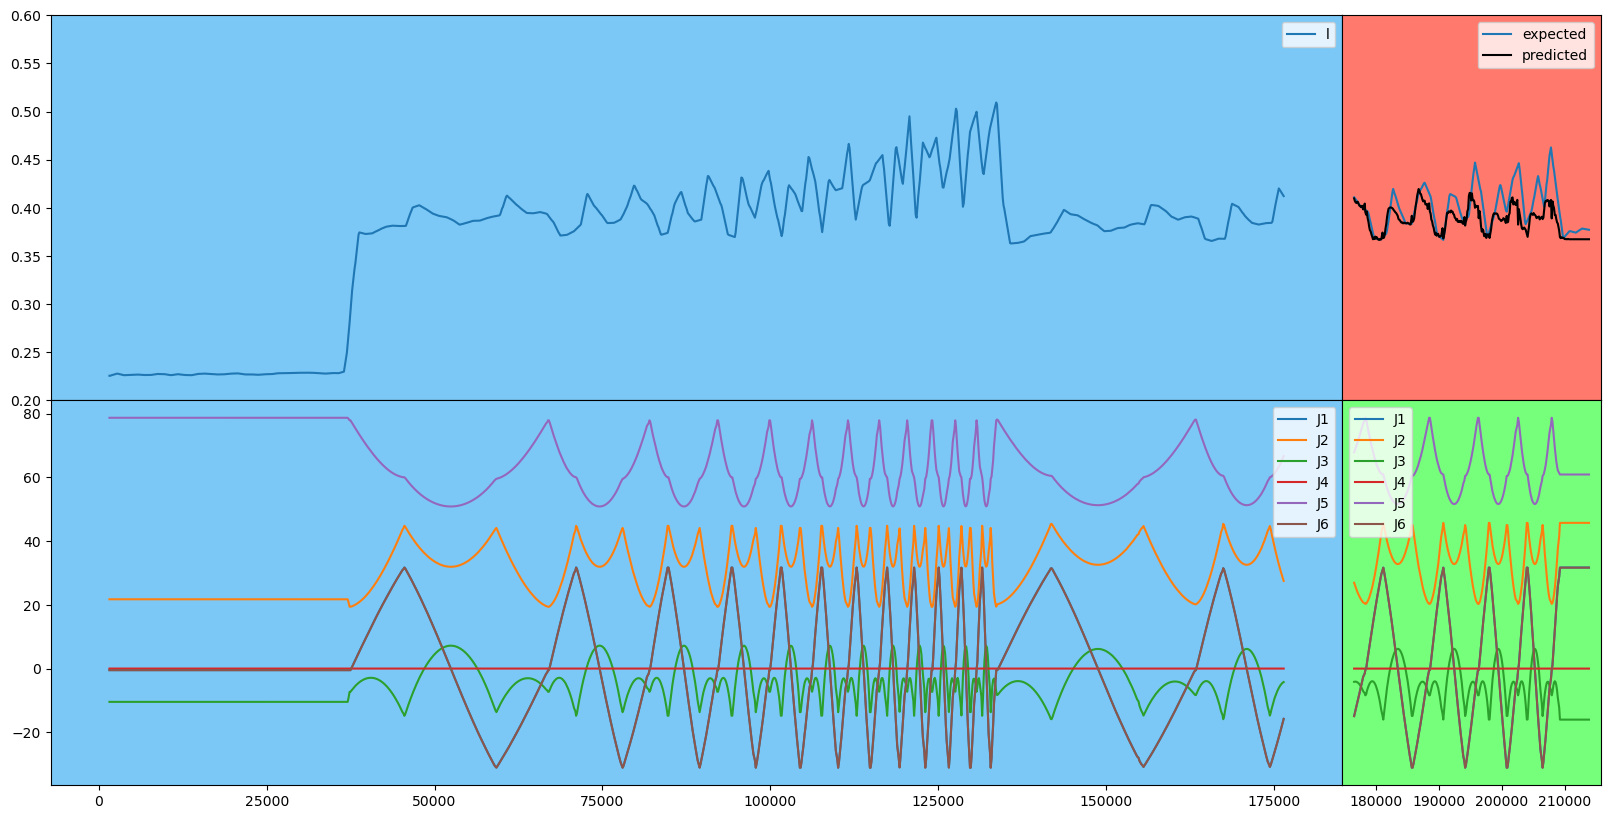

In [149]:
ax = plt.figure(figsize=(20, 10)).subplots(2, 2, gridspec_kw={'width_ratios': [10, 2]})
plt.subplots_adjust(wspace=0, hspace=0)

ax[0][0].set_ylim(ymin=0.2, ymax=0.6)
ax[0][1].set_ylim(ymin=0.2, ymax=0.6)

ax[0][0].set_facecolor('xkcd:lightblue')
ax[1][0].set_facecolor('xkcd:lightblue')
ax[0][1].set_facecolor('xkcd:salmon')
ax[1][1].set_facecolor('xkcd:lightgreen')

ax[0][1].set_xticks([])
ax[0][1].set_yticks([])

ax[0][0].plot(train_X["timp(ms)"], train_y)
ax[0][0].legend(("labels"))

ax[1][0].plot(train_X["timp(ms)"], train_X.drop(columns=["timp(ms)",  "X", "Y", "Z", "speed", "repetare", "task1", "sch operatii"]))
ax[1][0].legend(("J1", "J2", "J3", "J4", "J5", "J6"))



ax[0][1].plot(test_X["timp(ms)"], test_y)
ax[0][1].plot(test_X["timp(ms)"], predictii, c="k")
ax[0][1].legend(("expected", "predicted"))

ax[1][1].plot(test_X["timp(ms)"], test_X.drop(columns=["timp(ms)", "X", "Y", "Z", "speed", "repetare", "task1", "sch operatii"]))
ax[1][1].legend(("J1", "J2", "J3", "J4", "J5", "J6"))
ax[1][1].set_yticks([])

